In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [9]:
def read_yolo_coordinates(file_path, img_width, img_height):
    coordinates = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            class_index, x_center, y_center, width, height = map(float, line.split())
            x_min = int((x_center - width/2) * img_width)
            y_min = int((y_center - height/2) * img_height)
            x_max = int((x_center + width/2) * img_width)
            y_max = int((y_center + height/2) * img_height)
            coordinates.append((x_min, y_min, x_max, y_max))
    return coordinates

In [10]:

def crop_questions(image_path, yolo_coordinates_path):
  images = []
  image = cv2.imread(image_path)
  image
  img_height, img_width, _ = image.shape
  yolo_coordinates = read_yolo_coordinates(
      yolo_coordinates_path, 
      img_width, 
      img_height)
  
  for i, (x_min, y_min, x_max, y_max) in enumerate(yolo_coordinates):
    cropped_img = image[y_min:y_max, x_min:x_max]
    images.append(cropped_img)
    # cv2.imwrite(f'{image_path.split(".")[0]}_{i+1}.jpg', cropped_img)
  return images
   

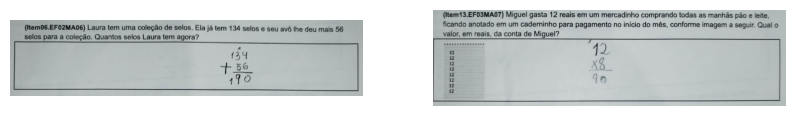

In [11]:
if __name__ == "__main__":
  images = crop_questions('teste.jpg', 'teste.txt')
  fig, axes = plt.subplots(1, 2, figsize=(10, 5))
  ax = axes.ravel()
  for i in range(2):
    ax[i].imshow(images[i])
    ax[i].set_axis_off()
  cv2.waitKey(0) 